In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Details(Point of sales)**
😲

Monthly balance snapshots of previous POS point of sales and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit consumer credit and cash loans related to loans in our sample.

The table has

-loans in sample

-of relative previous credits

-of months in which we have some history observable for the previous creditsrows.

#Feature Details


#SK_ID_PREV
ID of previous credit in Home Credit related to loan in our sample. One loan in our sample can have...

#SK_ID_CURR
ID of loan in our sample

#MONTHS_BALANCE
Month of balance relative to application date -1 means the information to the freshest monthly snap...
time only relative to the application

#CNT_INSTALMENT
Term of previous credit can change over time

#CNT_INSTALMENT_FUTURE
Installments left to pay on the previous credit

#NAME_CONTRACT_STATUS
Contract status during the month


#SK_DPD
DPD days past due during the month of previous credit


#SK_DPD_DEF
DPD during the month with tolerance debts with low loan amounts are ignored of the previous credit

In [21]:
df=pd.read_csv(r"/content/POS_CASH_balance.csv")

In [3]:
df.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0


In [22]:
df.shape

(10001358, 8)

In [6]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [23]:
#Checking The Null Values
df.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
CNT_INSTALMENT,26071
CNT_INSTALMENT_FUTURE,26087
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0


In [ ]:
#Here we can see that we have two important features having null values
#null Value analysis and Outlier Treatment

#CNT_INSTALMENT Treatment


<ipython-input-24-82d6b238580c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CNT_INSTALMENT'])


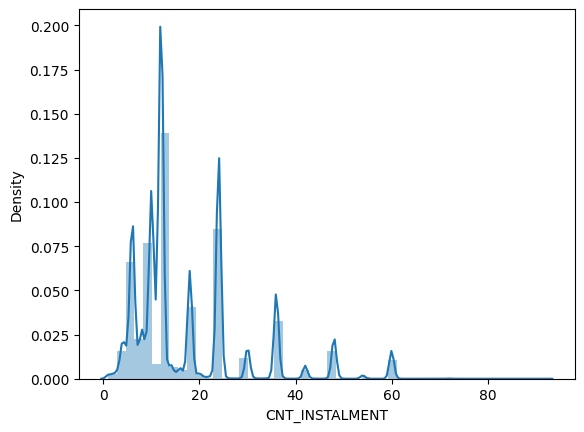

In [24]:
sns.distplot(df['CNT_INSTALMENT'])
plt.show()

In [ ]:
#Insights from above plot

#The distribution is right-skewed, with a long tail of higher values.
#The majority of the values are concentrated towards the lower end of the range.
#There are some outliers with very high CNT_INSTALMENT values.


<ipython-input-25-7d89121b651f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CNT_INSTALMENT'])


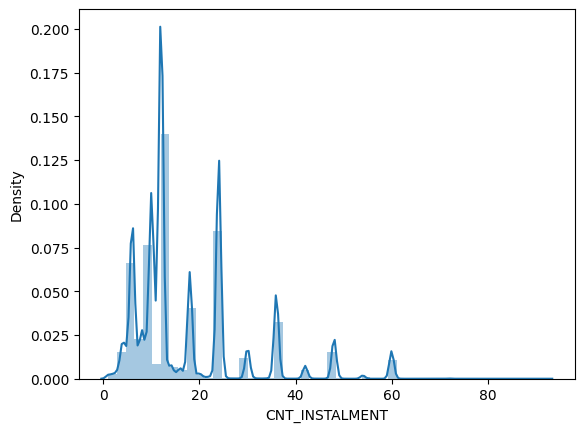

In [25]:
# Filling null values with median
df['CNT_INSTALMENT'].fillna(df['CNT_INSTALMENT'].median(), inplace=True)

#distribution after filling missing values
sns.distplot(df['CNT_INSTALMENT'])
plt.show()


In [26]:
# Additional insights:
df['CNT_INSTALMENT'].describe()
#quantiles, mean, std to understand spread of central tendency


,CNT_INSTALMENT
count,1.000136e+07
mean,1.707638e+01
std,1.198222e+01
min,1.000000e+00
25%,1.000000e+01
50%,1.200000e+01
75%,2.400000e+01
max,9.200000e+01


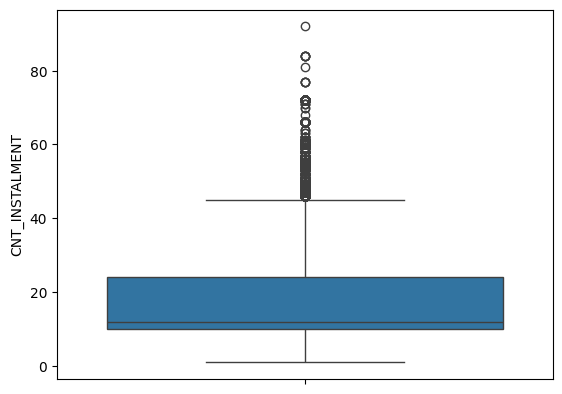

In [27]:
# Checking for outliers
sns.boxplot(df['CNT_INSTALMENT'])
plt.show()

In [ ]:
#Insights from the box plot:

#The box plot confirms the presence of outliers, as indicated by the points beyond the whiskers.
#The median (line inside the box) is closer to the lower quartile, suggesting a right-skewed distribution.
#The interquartile range (IQR), represented by the box, is relatively small compared to the range of the data.
#The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the quartiles.


In [28]:
#Checking for null values
df['CNT_INSTALMENT'].isnull().sum()


0

#CNT_INSTALMENT_FUTURE column null value and outlier treatment

<ipython-input-29-ea53bff25006>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CNT_INSTALMENT_FUTURE"])


<Axes: xlabel='CNT_INSTALMENT_FUTURE', ylabel='Density'>

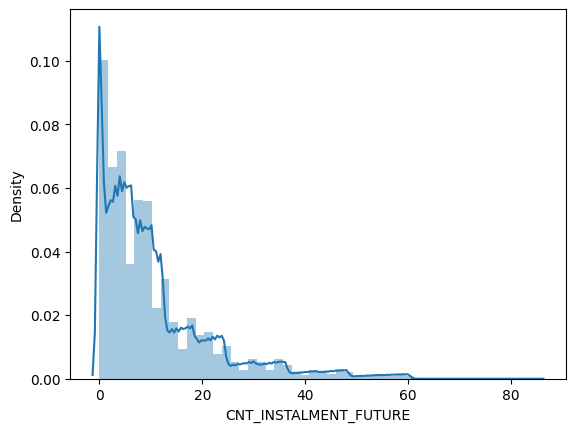

In [29]:
#Distribution
sns.distplot(df["CNT_INSTALMENT_FUTURE"])

In [ ]:
#Insights from the distplot of CNT_INSTALMENT_FUTURE.

#The distribution appears to be right-skewed, indicating a higher frequency of lower values.
#There's a concentration of values around zero, suggesting a significant number of instances with no future installments.
#The tail of the distribution extends towards higher values, indicating the presence of some cases with a larger number of future installments.


<ipython-input-30-803de9245b7a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CNT_INSTALMENT_FUTURE'])


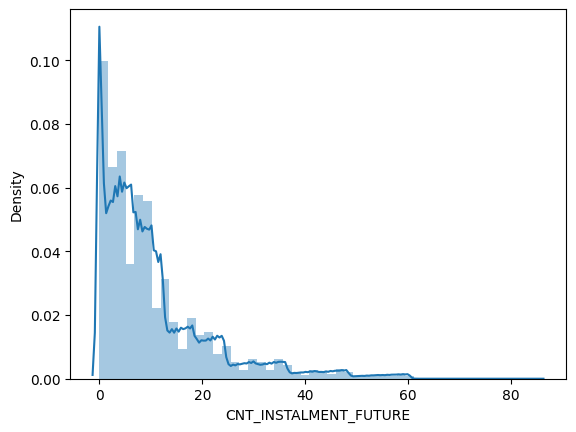

In [30]:
#Filling null values with median
df['CNT_INSTALMENT_FUTURE'].fillna(df['CNT_INSTALMENT_FUTURE'].median(), inplace=True)

#Distribution after filling missing values
sns.distplot(df['CNT_INSTALMENT_FUTURE'])
plt.show()


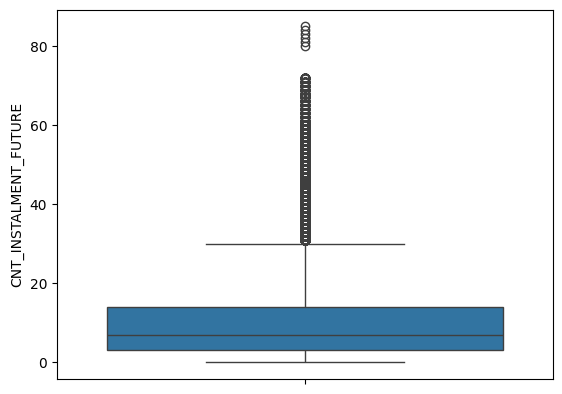

In [31]:
#Now Checking for outliers using boxplot
sns.boxplot(df['CNT_INSTALMENT_FUTURE'])
plt.show()

In [ ]:
#Insights from the box plot of CNT_INSTALMENT_FUTURE

#The box plot reveals the presence of outliers, indicated by the points beyond the whiskers.
#The median (line inside the box) is closer to the lower quartile, suggesting a right-skewed distribution.
#The interquartile range (IQR), represented by the box, is relatively narrow compared to the range of the data.
#The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the quartiles.


In [32]:
#Checking for null values
df['CNT_INSTALMENT_FUTURE'].isnull().sum()

0

# After Treatment

In [33]:
#This is for that one feature having one missing value
#It is done after Treating all the missing values and outlier treatment
df.dropna(inplace=True)

In [34]:
df.shape

(10001358, 8)

In [35]:
#Final Null value check
df.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
CNT_INSTALMENT,0
CNT_INSTALMENT_FUTURE,0
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0


In [30]:
df.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,45.0,41.5,Active,0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0,0.0


<ipython-input-37-612903119370>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


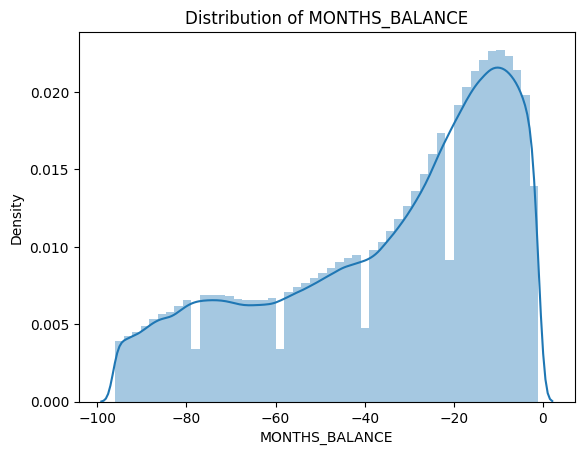

<ipython-input-37-612903119370>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


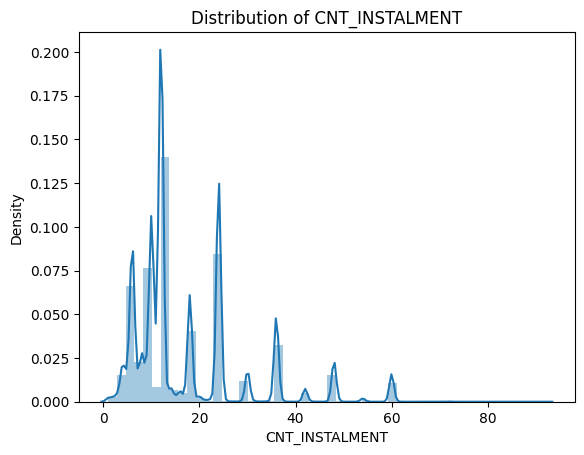

<ipython-input-37-612903119370>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


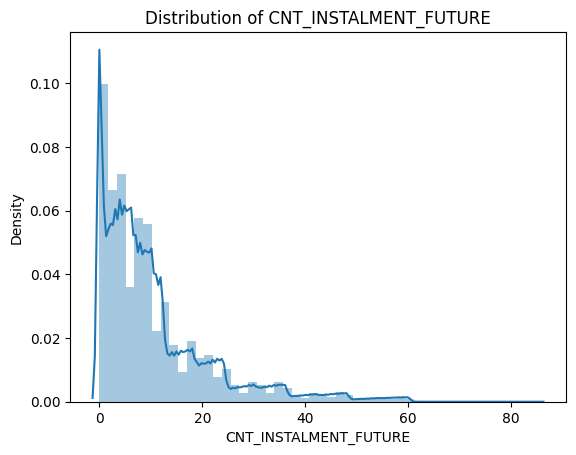

<ipython-input-37-612903119370>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


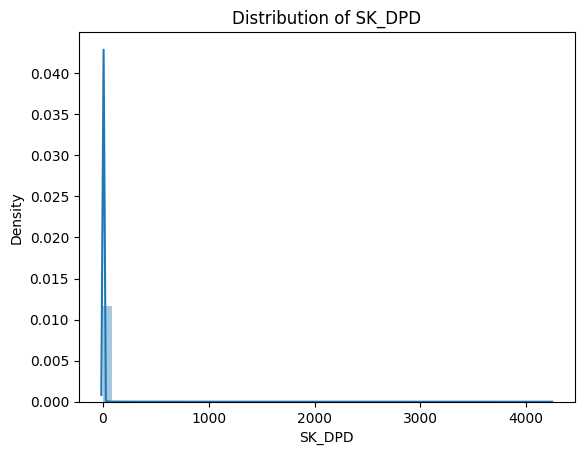

<ipython-input-37-612903119370>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


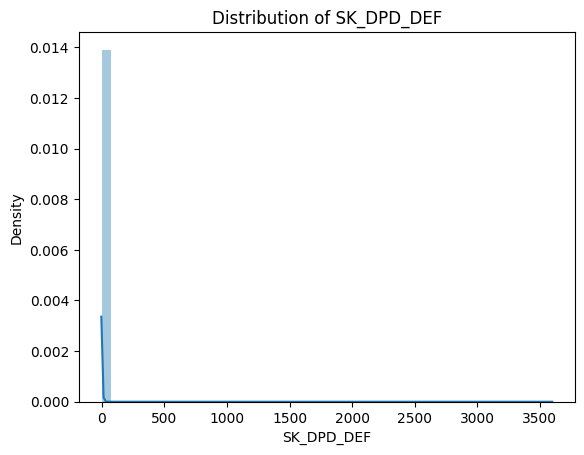

In [37]:
# Selecting numerical columns excluding the first two
numerical_cols = df.select_dtypes(include=['number']).columns[2:]

# Creating distplots for each numerical feature
for col in numerical_cols:
  plt.figure()  # Create a new figure for each plot
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()


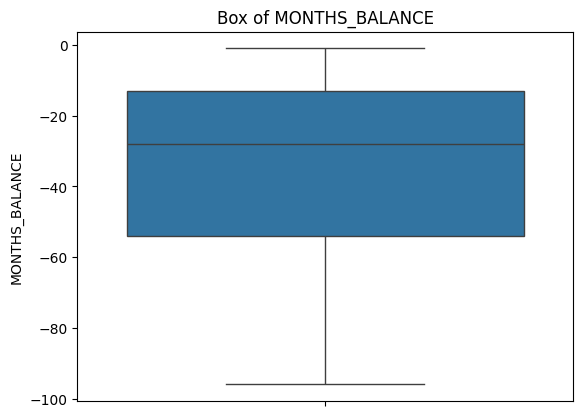

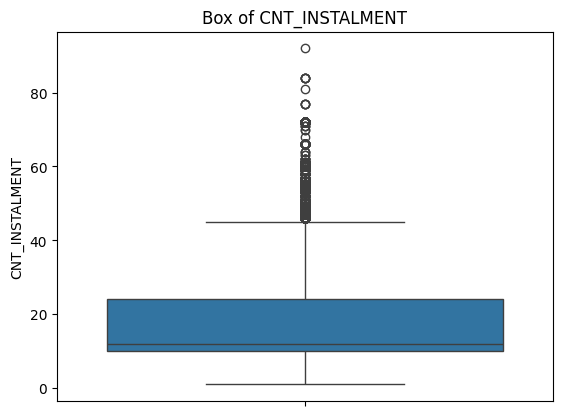

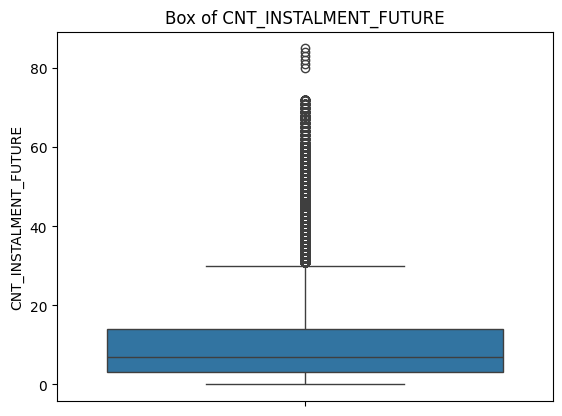

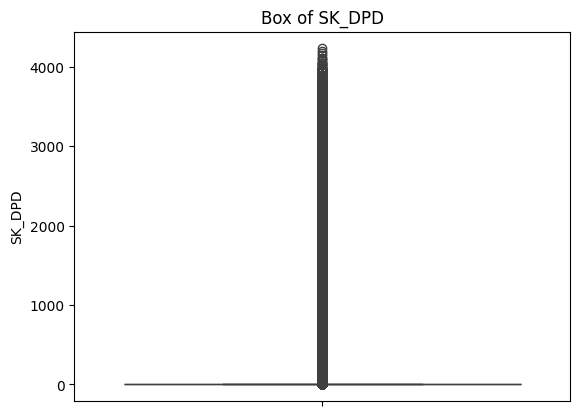

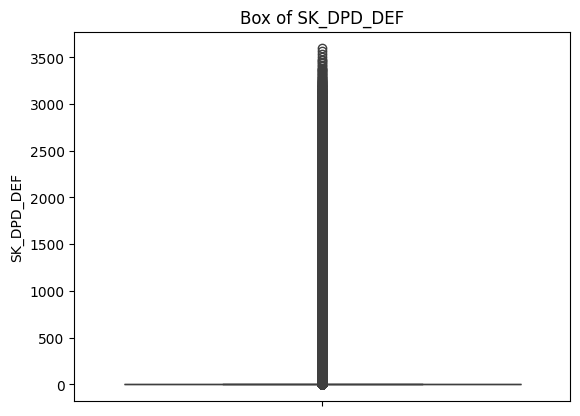

In [36]:
#Boxplot for all the numerical features of dataset

#Selecting numerical columns excluding the first two columns
numerical_cols = df.select_dtypes(include=['number']).columns[2:]

#Creating boxplots for each numerical feature
for col in numerical_cols:
  plt.figure()  # Create a new figure for each plot
  sns.boxplot(df[col])
  plt.title(f'Box of {col}')
  plt.show()

In [44]:
# Define the columns to aggregate
columns_to_aggregate = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF']

# Define the aggregations
aggregations = ['sum', 'mean']

# Create a dictionary to specify the aggregations for each column
agg_dict = {col: aggregations for col in columns_to_aggregate}

# Group by 'SK_ID_CURR' and apply the aggregations
grouped_df = df.groupby('SK_ID_CURR').agg(agg_dict).round(2)

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

# Reset index to make 'SK_ID_CURR' a column again
grouped_df = grouped_df.reset_index()
grouped_df

,SK_ID_CURR,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,CNT_INSTALMENT_sum,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_sum,CNT_INSTALMENT_FUTURE_mean,SK_DPD_sum,SK_DPD_mean,SK_DPD_DEF_sum,SK_DPD_DEF_mean
0,100001,-653,-72.56,36.0,4.00,13.0,1.44,7,0.78,7,0.78
1,100002,-190,-10.00,456.0,24.00,285.0,15.00,0,0.00,0,0.00
2,100003,-1226,-43.79,283.0,10.11,162.0,5.79,0,0.00,0,0.00
3,100004,-102,-25.50,15.0,3.75,9.0,2.25,0,0.00,0,0.00
4,100005,-220,-20.00,129.0,11.73,79.0,7.18,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,-45,-5.00,75.0,8.33,42.0,4.67,0,0.00,0,0.00
337248,456252,-553,-79.00,42.0,6.00,21.0,3.00,0,0.00,0,0.00
337249,456253,-1347,-79.24,114.0,6.71,34.0,2.00,5,0.29,5,0.29
337250,456254,-111,-5.55,298.0,14.90,207.0,10.35,0,0.00,0,0.00


In [49]:
df_enc = df[['SK_ID_CURR','NAME_CONTRACT_STATUS']]

In [53]:
df_dumm = pd.get_dummies(df_enc['NAME_CONTRACT_STATUS'], drop_first = True, dtype = 'int')

In [54]:
dumm_df = pd.concat([df_enc['SK_ID_CURR'], df_dumm], axis = 1)

In [58]:
dummies = dumm_df.groupby('SK_ID_CURR').mean().reset_index()

In [59]:
df_enc_merged = grouped_df.merge(dummies, on = 'SK_ID_CURR', how = 'inner')

In [60]:
df_enc_merged.head()

,SK_ID_CURR,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,CNT_INSTALMENT_sum,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_sum,CNT_INSTALMENT_FUTURE_mean,SK_DPD_sum,SK_DPD_mean,SK_DPD_DEF_sum,SK_DPD_DEF_mean,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed,XNA
0,100001,-653,-72.56,36.0,4.00,13.0,1.44,7,0.78,7,0.78,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0
1,100002,-190,-10.00,456.0,24.00,285.0,15.00,0,0.00,0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,100003,-1226,-43.79,283.0,10.11,162.0,5.79,0,0.00,0,0.00,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0
3,100004,-102,-25.50,15.0,3.75,9.0,2.25,0,0.00,0,0.00,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0
4,100005,-220,-20.00,129.0,11.73,79.0,7.18,0,0.00,0,0.00,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0


In [62]:
df_enc_merged_trans = ['MONTHS_BALANCE_sum', 'MONTHS_BALANCE_mean',
       'CNT_INSTALMENT_sum', 'CNT_INSTALMENT_mean',
       'CNT_INSTALMENT_FUTURE_sum', 'CNT_INSTALMENT_FUTURE_mean', 'SK_DPD_sum',
       'SK_DPD_mean', 'SK_DPD_DEF_sum', 'SK_DPD_DEF_mean']

In [63]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df_pt=pd.DataFrame(pt.fit_transform(df_enc_merged[df_enc_merged_trans]),columns=df_enc_merged_trans)


In [66]:
df_pt.insert(loc = 0 , column = 'SK_ID_CURR', value = df_enc_merged['SK_ID_CURR'])

In [68]:
df_fin = df_pt.merge(dummies, on ='SK_ID_CURR', how = 'inner' )

In [70]:
df_fin.to_csv('POS_CASH_balance_final.csv', index = False)